In [1]:
# Imports
from common import display_input_data, check_input_data_indices, train_model, prepare_dataset, evaluate_model, \
    run_input_optimizer, calculate_accuracy, calculate_error_rate
import pandas as pd
import numpy as np
import ipywidgets as widgets
import pickle


In [2]:
# Parameters
# Chose the variables to crate the model
input_cols = ['shape', 'profile_entrance','rising_entrance', 'rising_exit', 'shards', 'feathering', 'entrance_mounding', 'center_mounding', 'exit_mounding', 'mounding']
result_col = 'result'
train_dataset_file = '../DATA/Train/serration_prediction_train.xlsx'
test_dataset_file = '../DATA/Validation/serration_prediction_validation.xlsx'

In [3]:
# The data are displayed on a table
display_input_data(
    train_dataset_file,
    input_cols
)


,shape_E,shape_indeterminate,profile_entrance_V,rising_entrance_bilateral,rising_entrance_single,rising_exit_bilateral,rising_exit_single,shards_present,feathering_present,entrance_mounding_bilateral,entrance_mounding_single,center_mounding_bilateral,center_mounding_single,exit_mounding_bilateral,exit_mounding_single,mounding_marked,mounding_not marked
0,False,True,True,False,True,False,True,False,False,False,True,False,False,False,True,False,True
1,False,True,False,False,True,True,False,False,False,False,True,False,False,False,True,False,True
2,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True
3,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True
4,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,True,False,True,False,True,False,True,False,False,False,True,False,False,False,True,True,False
276,True,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False
277,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
278,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [4]:
# The two datasets are tested for compatibility 
check_input_data_indices(train_dataset_file, test_dataset_file, input_cols)

Datasets are compatible


In [5]:
# Logistic regression model
model = train_model(
    train_dataset_file,
    input_cols,
    result_col
)

filename = '../models/blade-serration.pickle'
pickle.dump(model, open(filename, 'wb'))

print(f'Saved model to {filename}')

# model
print('b0 = ' + str(model.intercept_))
print('b1...n = ' + str(model.coef_))

Saved model to ../models/blade-serration.pickle
b0 = [1.89805054]
b1...n = [[-1.28763665 -1.3709938  -0.69389095 -1.87532169 -1.65732524 -1.33430855
  -0.19921929  1.96985283  1.70264198 -0.66138195 -0.19356042 -0.47517525
  -0.35572447 -0.36603696  1.01926792  0.39155683 -0.01977837]]


In [6]:
evaluate_model(
    model,
    test_dataset_file,
    input_cols,
    result_col
)

0.7313432835820896

In [7]:
# Test for overfitting
# Evaluation of the training
x_train, y_train = prepare_dataset(train_dataset_file, input_cols, result_col)
model.score(x_train, y_train)

0.8571428571428571

In [8]:
from sklearn import metrics

#get the column from the test dataset 
df = pd.read_excel(test_dataset_file)
y_df = df[result_col].str.strip()
y = pd.get_dummies(y_df, drop_first=True).iloc[:, 0]
# #get the predicted value
y_pred = model.predict(prepare_dataset(test_dataset_file, input_cols))
print(y_pred)
print(y)

#create the confusion matrix 

cnf_matrix = metrics.confusion_matrix(y,y_pred)
cnf_matrix

[ True  True  True False  True False False  True False False  True  True
  True False False  True False False False  True  True  True  True  True
  True False False  True False False False False False False False False
 False False False  True  True False  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True False False False
 False False  True  True False  True False]
0     False
1     False
2     False
3     False
4     False
      ...  
62    False
63    False
64    False
65    False
66    False
Name: serrated, Length: 67, dtype: bool


array([[27, 13],
       [ 5, 22]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

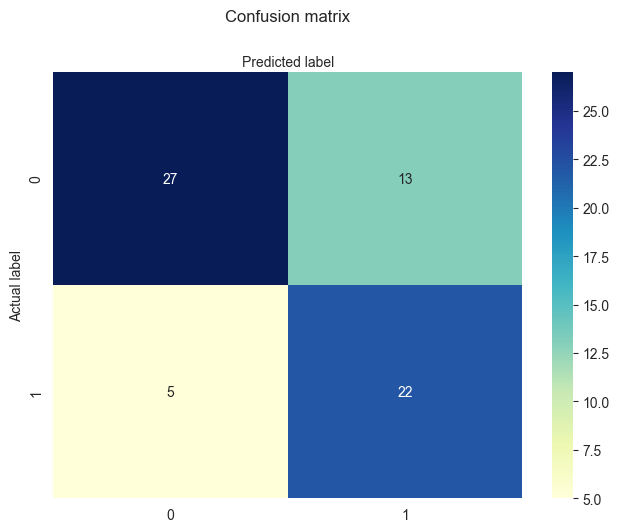

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [10]:
from sklearn.metrics import classification_report
target_names = ['non serrated', 'serrated']
print(classification_report(y, y_pred, target_names = target_names))

              precision    recall  f1-score   support

non serrated       0.84      0.68      0.75        40
    serrated       0.63      0.81      0.71        27

    accuracy                           0.73        67
   macro avg       0.74      0.74      0.73        67
weighted avg       0.76      0.73      0.73        67


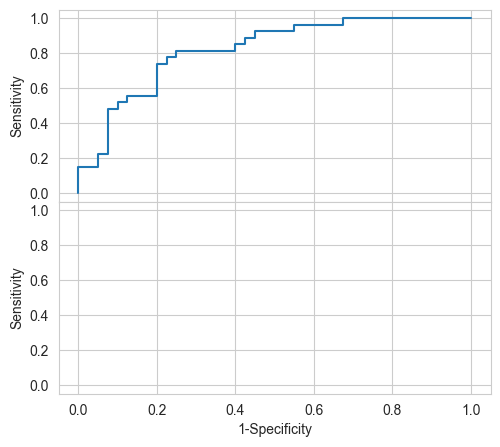

In [11]:
y_pred_proba = model.predict_proba(prepare_dataset(test_dataset_file, input_cols))[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)

fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
axs[0].plot(fpr,tpr,label="data 1, auc="+str(auc))



for ax in axs.flat:
    ax.set(xlabel='1-Specificity', ylabel='Sensitivity')

for ax in axs.flat:
    ax.label_outer()
plt.show()

In [12]:
# 11 variables were used 
evaluate_model(
    model,
    test_dataset_file,
    input_cols,
    result_col
)

0.7313432835820896

In [13]:
# filter data for the new dataframe
df = pd.read_excel(train_dataset_file)
x_df = df[input_cols].apply(lambda x: x.str.strip())
x = pd.get_dummies(x_df, drop_first=True)

result = model.predict(x)
print(result)
# this paragraph was created to see if serrated or non serrated corresponded either False or True
# True corresponds to serrated

[False False False False False False False False  True False False False
 False  True  True False False  True False False  True  True False  True
 False False  True  True False  True False False False  True  True  True
  True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True  True  True  True  T

In [14]:
# filter data for the new dataframe
df = pd.read_excel(test_dataset_file)
label = df["label"]
string_expresult = df["result"]

x_df = df[input_cols].apply(lambda x: x.str.strip())
x = pd.get_dummies(x_df, drop_first=True)

result = model.predict(x)

print(string_expresult)
print(result)


0     non-serrated
1     non-serrated
2     non-serrated
3     non-serrated
4     non-serrated
          ...     
62    non-serrated
63    non-serrated
64    non-serrated
65    non-serrated
66    non-serrated
Name: result, Length: 67, dtype: object
[ True  True  True False  True False False  True False False  True  True
  True False False  True False False False  True  True  True  True  True
  True False False  True False False False False False False False False
 False False False  True  True False  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True False False False
 False False  True  True False  True False]


In [15]:
# to organize better the things, we have to create a new list for the "result" and transform them in boolean

expected_result = []
for x in string_expresult:

    if x == "serrated":
        expected_result.append(True)
    
    else:
        expected_result.append(False)

print(expected_result)



[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False]


In [16]:
#build dataframe with result, expected result and label 

data = {'label': label, 'result': result, "expected_result" : expected_result}  
  
# Create DataFrame  
df = pd.DataFrame(data)  
   
#print(df)  

grouped_df = df.groupby(by = "label")

#print(grouped_df.head())


In [17]:
five = grouped_df.get_group(5)
six = grouped_df.get_group(6)
seven = grouped_df.get_group(7)

serrated = pd.concat([five, six, seven], ignore_index= True)

print(f'serrated\n{serrated}\n')
serrated_accuracy = calculate_accuracy(serrated)

print( "For serrated class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", serrated_accuracy, "\n")


serrated
    label  result  expected_result
0       5    True             True
1       5    True             True
2       5   False             True
3       5    True             True
4       5    True             True
5       5    True             True
6       5    True             True
7       5    True             True
8       5    True             True
9       6    True             True
10      6    True             True
11      6    True             True
12      6   False             True
13      6    True             True
14      6    True             True
15      6    True             True
16      6    True             True
17      6    True             True
18      7    True             True
19      7    True             True
20      7    True             True
21      7    True             True
22      7    True             True
23      7   False             True
24      7   False             True
25      7    True             True
26      7   False             True

For serrat

In [18]:
for name, sub_df in grouped_df:
    print(f'{name}\n{sub_df}\n')

1
    label  result  expected_result
57      1   False            False
58      1   False            False
59      1   False            False
60      1   False            False
61      1   False            False
62      1    True            False
63      1    True            False
64      1   False            False
65      1    True            False
66      1   False            False

2
   label  result  expected_result
0      2    True            False
1      2    True            False
2      2    True            False
3      2   False            False
4      2    True            False
5      2   False            False
6      2   False            False
7      2    True            False
8      2   False            False
9      2   False            False

3
    label  result  expected_result
29      3   False            False
30      3   False            False
31      3   False            False
32      3   False            False
33      3   False            False
34      3   False      

In [19]:
# calculate accuracy for non_serrated class
one = grouped_df.get_group(1)
two = grouped_df.get_group(2)
three = grouped_df.get_group(3)
four = grouped_df.get_group(4)

non_serrated = pd.concat([one, two, three, four], ignore_index= True)
print(f'non-serrated\n{non_serrated}\n')
non_serrated_accuracy = calculate_accuracy(non_serrated)

print( "For non-serrated class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", non_serrated_accuracy, "\n")


non-serrated
    label  result  expected_result
0       1   False            False
1       1   False            False
2       1   False            False
3       1   False            False
4       1   False            False
5       1    True            False
6       1    True            False
7       1   False            False
8       1    True            False
9       1   False            False
10      2    True            False
11      2    True            False
12      2    True            False
13      2   False            False
14      2    True            False
15      2   False            False
16      2   False            False
17      2    True            False
18      2   False            False
19      2   False            False
20      3   False            False
21      3   False            False
22      3   False            False
23      3   False            False
24      3   False            False
25      3   False            False
26      3   False            False
27     

In [20]:
# calculate accuracy for non_serrated class without knife number 4
one = grouped_df.get_group(1)
two = grouped_df.get_group(2)
three = grouped_df.get_group(3)


non_serrated = pd.concat([one, two, three], ignore_index= True)
print(f'non-serrated\n{non_serrated}\n')
non_serrated_accuracy = calculate_accuracy(non_serrated)

print( "For non-serrated class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", non_serrated_accuracy, "\n")

non-serrated
    label  result  expected_result
0       1   False            False
1       1   False            False
2       1   False            False
3       1   False            False
4       1   False            False
5       1    True            False
6       1    True            False
7       1   False            False
8       1    True            False
9       1   False            False
10      2    True            False
11      2    True            False
12      2    True            False
13      2   False            False
14      2    True            False
15      2   False            False
16      2   False            False
17      2    True            False
18      2   False            False
19      2   False            False
20      3   False            False
21      3   False            False
22      3   False            False
23      3   False            False
24      3   False            False
25      3   False            False
26      3   False            False
27     

In [21]:
#calculate classification accuracy for each knife 
for name, sub_df in grouped_df:
    accuracy_perc = calculate_accuracy(sub_df)
  
    print( "knife:", name) 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
    
    print( "accuracy %:", accuracy_perc, "\n")
       


knife: 1
accuracy %: 70.0 

knife: 2
accuracy %: 50.0 

knife: 3
accuracy %: 100.0 

knife: 4
accuracy %: 50.0 

knife: 5
accuracy %: 88.88888888888889 

knife: 6
accuracy %: 88.88888888888889 

knife: 7
accuracy %: 66.66666666666666 


In [22]:
#calcolate error rate for each knife
for name, sub_df in grouped_df:
    error_rate = calculate_error_rate(sub_df)
    
    print( "knife:", name)
    print( "error rate %:", error_rate, "\n")

knife: 1
error rate %: 30.0 

knife: 2
error rate %: 50.0 

knife: 3
error rate %: 0.0 

knife: 4
error rate %: 50.0 

knife: 5
error rate %: 11.111111111111114 

knife: 6
error rate %: 11.111111111111114 

knife: 7
error rate %: 33.33333333333334 


In [23]:
# Model optimisation, search for the optimal parameter combination
# Printing score best and worst model
optimizer_results = run_input_optimizer(train_dataset_file, test_dataset_file, input_cols, result_col)

print('Max score: ' + str(optimizer_results['max_score']))
print('Best columns combination: ' + str(optimizer_results['max_score_cols']))
print('Min score: ' + str(optimizer_results['min_score']))
print('Worse columns combination: ' + str(optimizer_results['min_score_cols']))

# Convert from tuple to list for easier use later
optimized_input_cols = list(optimizer_results['max_score_cols'])
optimized_model = optimizer_results['max_score_model']
filename = '../models/blade-serration-optimized.pickle'
pickle.dump(optimized_model, open(filename, 'wb'))

print(f'Saved optimized model to {filename}')

Testing combinations of length 2
Testing combinations of length 3
Testing combinations of length 4
Testing combinations of length 5
Testing combinations of length 6
Testing combinations of length 7
Testing combinations of length 8
Testing combinations of length 9
Testing combinations of length 10
Max score: 0.8805970149253731
Best columns combination: ('shape', 'profile_entrance', 'rising_exit', 'shards', 'center_mounding')
Min score: 0.4626865671641791
Worse columns combination: ('feathering', 'entrance_mounding')
Saved optimized model to ../models/blade-serration-optimized.pickle


In [24]:
evaluate_model(optimized_model, train_dataset_file, optimized_input_cols, result_col)

0.8071428571428572

In [25]:
evaluate_model(optimized_model, test_dataset_file, optimized_input_cols, result_col)

0.8805970149253731

In [26]:
# filter data for the new dataframe
df = pd.read_excel(test_dataset_file)
label = df["label"]
# Inline conversion from str to bool
expected_result = df["result"].map(lambda exp_res: True if exp_res == 'serrated' else False)

x_df = df[optimized_input_cols].apply(lambda x: x.str.strip())
x = pd.get_dummies(x_df, drop_first=True)

result = optimized_model.predict(x)

print(f'Expected result:\n{expected_result}')
print(f'Actual result:\n{result}')

Expected result:
0     False
1     False
2     False
3     False
4     False
      ...  
62    False
63    False
64    False
65    False
66    False
Name: result, Length: 67, dtype: bool
Actual result:
[False  True False False  True False False  True False False False False
  True False False False False False False False False  True  True  True
  True  True  True  True False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True False False  True
 False False False False False False False]


In [27]:
#build dataframe with result, expected result and label 

data = {'label': label, 'result': result, "expected_result" : expected_result}  
  
# Create DataFrame  
df = pd.DataFrame(data)  
   
print(df)  

grouped_df = df.groupby(by = "label")

print(grouped_df.head())

    label  result  expected_result
0       2   False            False
1       2    True            False
2       2   False            False
3       2   False            False
4       2    True            False
..    ...     ...              ...
62      1   False            False
63      1   False            False
64      1   False            False
65      1   False            False
66      1   False            False

[67 rows x 3 columns]
    label  result  expected_result
0       2   False            False
1       2    True            False
2       2   False            False
3       2   False            False
4       2    True            False
10      4   False            False
11      4   False            False
12      4    True            False
13      4   False            False
14      4   False            False
20      7   False             True
21      7    True             True
22      7    True             True
23      7    True             True
24      7    True             Tr

In [28]:
cnf_matrix = metrics.confusion_matrix(expected_result,result)
cnf_matrix

array([[35,  5],
       [ 3, 24]], dtype=int64)

In [29]:
# Optimized model: calculate the accuracy for the four knives that are serrated 

five = grouped_df.get_group(5)
six = grouped_df.get_group(6)
seven = grouped_df.get_group(7)

serrated = pd.concat([five, six, seven], ignore_index= True)
print(f'serrated\n{serrated}\n')
serrated_accuracy = calculate_accuracy(serrated)

print( "For serrated class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", serrated_accuracy, "\n")

serrated
    label  result  expected_result
0       5    True             True
1       5    True             True
2       5    True             True
3       5    True             True
4       5    True             True
5       5    True             True
6       5    True             True
7       5    True             True
8       5    True             True
9       6    True             True
10      6    True             True
11      6    True             True
12      6   False             True
13      6    True             True
14      6    True             True
15      6    True             True
16      6    True             True
17      6    True             True
18      7   False             True
19      7    True             True
20      7    True             True
21      7    True             True
22      7    True             True
23      7    True             True
24      7    True             True
25      7    True             True
26      7   False             True

For serrat

Text(0.5, 427.9555555555555, 'Predicted label')

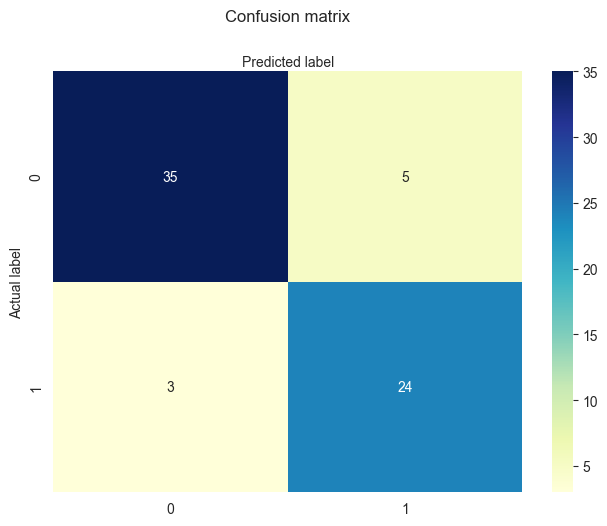

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
from sklearn.metrics import classification_report
target_names = ['single', 'double']
print(classification_report(expected_result, result, target_names=target_names))

              precision    recall  f1-score   support

      single       0.92      0.88      0.90        40
      double       0.83      0.89      0.86        27

    accuracy                           0.88        67
   macro avg       0.87      0.88      0.88        67
weighted avg       0.88      0.88      0.88        67


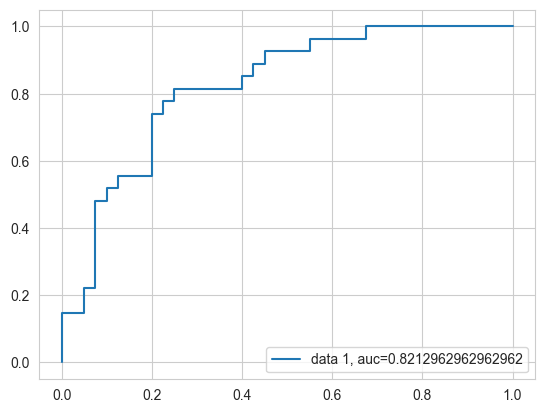

In [32]:
y_pred_proba = model.predict_proba(prepare_dataset(test_dataset_file, input_cols))[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [33]:
# Optimized model: calculate the accuracy for the four knives that are non-serrated 

one = grouped_df.get_group(1)
two = grouped_df.get_group(2)
three = grouped_df.get_group(3)
four = grouped_df.get_group(4)

non_serrated = pd.concat([one, two, three, four], ignore_index= True)
print(f'non-serrated\n{non_serrated}\n')
non_serrated_accuracy = calculate_accuracy(non_serrated)

print( "For non-serrated class") 
    #print("total correct:", tot_corr)
    #print('total:', tot) 
    
print("accuracy %:", non_serrated_accuracy, "\n")

non-serrated
    label  result  expected_result
0       1   False            False
1       1   False            False
2       1    True            False
3       1   False            False
4       1   False            False
5       1   False            False
6       1   False            False
7       1   False            False
8       1   False            False
9       1   False            False
10      2   False            False
11      2    True            False
12      2   False            False
13      2   False            False
14      2    True            False
15      2   False            False
16      2   False            False
17      2    True            False
18      2   False            False
19      2   False            False
20      3   False            False
21      3   False            False
22      3   False            False
23      3   False            False
24      3   False            False
25      3   False            False
26      3   False            False
27     

In [34]:
for name, sub_df in grouped_df:
    accuracy_perc = calculate_accuracy(sub_df)
    error_rate_perc = calculate_error_rate(sub_df)
    
    print( "knife:", name) 
    print( "accuracy %:", accuracy_perc)
    print( "error rate %:", error_rate_perc, "\n")

knife: 1
accuracy %: 90.0
error rate %: 10.0 

knife: 2
accuracy %: 70.0
error rate %: 30.0 

knife: 3
accuracy %: 100.0
error rate %: 0.0 

knife: 4
accuracy %: 90.0
error rate %: 10.0 

knife: 5
accuracy %: 100.0
error rate %: 0.0 

knife: 6
accuracy %: 88.88888888888889
error rate %: 11.111111111111114 

knife: 7
accuracy %: 77.77777777777779
error rate %: 22.222222222222214 


In [35]:
# tex = "$$p = {\frac{1}{1 + e ^ {-(\beta_0 + \beta_1X_i + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5)}}}$$"
# tex = "$$p = {\frac{1}{1 + e ^ {-(3 + 2X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5)}}}$$"
tex = r"$$p = {\frac{1}{1 + e ^ {-("

# Add intercept
tex += str(np.round(model.intercept_[0], decimals=2))

 
# Add coefficients
for i, b in enumerate(model.coef_[0]):
    if b < 0:
        sign = '-'
    elif b > 0:
        sign = '+'
    else:
        continue
    tex += f"{sign}{str(np.abs(np.round(b, decimals=2)))}x_{{{str(i+1)}}}"

tex += ")}}}$$"

widgets.HTMLMath(
    value=tex,
    placeholder='Logistic regression',
)

HTMLMath(value='$$p = {\\frac{1}{1 + e ^ {-(1.9-1.29x_{1}-1.37x_{2}-0.69x_{3}-1.88x_{4}-1.66x_{5}-1.33x_{6}-0.…